In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 데이터 추출

In [2]:
# kepsh1 엑셀 데이터 추출

files = glob.glob('./kpeb2/*.xls')

all_data = pd.DataFrame()
for f in files:
    data = pd.read_csv(f, encoding='euc-kr', engine= 'python',  header=0, sep='\t+')
    
    df = pd.DataFrame(data)
    
    all_data = all_data.append(df, ignore_index=True)
    print(f, all_data.shape)
all_data


./kpeb2\2020-11-23 16시 06분 46초.xls (473, 22)
./kpeb2\2020-11-24 00시 00분 00초.xls (1913, 22)
./kpeb2\2020-11-25 00시 00분 00초.xls (2865, 22)
./kpeb2\2020-11-25 15시 52분 41초.xls (2866, 22)
./kpeb2\2020-11-25 15시 54분 43초.xls (2866, 22)
./kpeb2\2020-11-25 15시 55분 02초.xls (2909, 22)
./kpeb2\2020-11-25 16시 40분 23초.xls (3348, 22)
./kpeb2\2020-11-26 00시 00분 00초.xls (4788, 22)
./kpeb2\2020-11-27 00시 00분 00초.xls (6228, 22)
./kpeb2\2020-11-28 00시 00분 00초.xls (7668, 22)
./kpeb2\2020-11-29 00시 00분 00초.xls (9108, 22)
./kpeb2\2020-11-30 00시 00분 00초.xls (10548, 22)
./kpeb2\2020-12-01 00시 00분 00초.xls (11295, 22)
./kpeb2\2020-12-01 12시 28분 39초.xls (11302, 22)
./kpeb2\2020-12-01 12시 47분 14초.xls (11974, 22)
./kpeb2\2020-12-02 00시 00분 00초.xls (13414, 22)
./kpeb2\2020-12-03 00시 00분 00초.xls (14854, 22)
./kpeb2\2020-12-04 00시 00분 00초.xls (16294, 22)
./kpeb2\2020-12-05 00시 00분 00초.xls (17734, 22)
./kpeb2\2020-12-06 00시 00분 00초.xls (19174, 22)
./kpeb2\2020-12-07 00시 00분 00초.xls (20614, 22)
./kpeb2\2020-12-08 00시 00

./kpeb2\2021-03-09 11시 09분 23초.xls (150077, 22)
./kpeb2\2021-03-09 13시 07분 36초.xls (150729, 22)
./kpeb2\2021-03-10 00시 00분 00초.xls (152169, 22)
./kpeb2\2021-03-11 00시 00분 00초.xls (153609, 22)
./kpeb2\2021-03-12 00시 00분 00초.xls (155049, 22)
./kpeb2\2021-03-13 00시 00분 00초.xls (156489, 22)
./kpeb2\2021-03-14 00시 00분 00초.xls (157929, 22)
./kpeb2\2021-03-15 00시 00분 00초.xls (159369, 22)
./kpeb2\2021-03-16 00시 00분 00초.xls (160809, 22)
./kpeb2\2021-03-17 00시 00분 00초.xls (162249, 22)
./kpeb2\2021-03-18 00시 00분 00초.xls (163034, 22)
./kpeb2\2021-03-18 13시 05분 37초.xls (163048, 22)
./kpeb2\2021-03-18 13시 30분 54초.xls (163677, 22)
./kpeb2\2021-03-19 00시 00분 00초.xls (165117, 22)
./kpeb2\2021-03-20 00시 00분 00초.xls (165618, 22)
./kpeb2\2021-03-23 13시 25분 48초.xls (165672, 22)
./kpeb2\2021-03-23 14시 32분 50초.xls (165755, 22)
./kpeb2\2021-03-23 15시 59분 12초.xls (166235, 22)
./kpeb2\2021-03-24 00시 00분 00초.xls (167675, 22)
./kpeb2\2021-03-25 00시 00분 00초.xls (168612, 22)
./kpeb2\2021-03-25 15시 39분 25초.xls (1686

,Time,PV1(V),PV1(A),PV1(kW),계통전압1(V),계통전류1(A),발전량1(kW),총발전량1(kWh),PV2(V),PV2(A),...,계통전류2(A),발전량2(kW),총발전량2(kWh),TF-1(℃),TF-2(℃),TF-3(℃),TB-1(℃),TB-2(℃),TB-3(℃),일사(W/㎡)
0,2020-11-23 오후 4:07:45,312.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.4,...,2.6,0.5,86.0,25.26,20.66,18.25,23.46,18.41,15.00,NaN
1,2020-11-23 오후 4:08:45,315.0,0.8,0.2,215.0,1.1,0.2,80.0,412.0,1.4,...,2.7,0.5,86.0,25.41,20.34,17.92,23.73,18.84,15.24,NaN
2,2020-11-23 오후 4:09:45,334.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.3,...,2.0,0.5,86.0,25.72,20.85,18.09,23.89,19.24,15.32,NaN
3,2020-11-23 오후 4:10:45,352.0,0.7,0.2,214.0,1.2,0.2,80.0,412.0,1.2,...,2.3,0.5,86.0,25.99,21.56,18.34,24.22,19.57,15.66,NaN
4,2020-11-23 오후 4:11:45,330.0,0.7,0.2,215.0,1.1,0.2,80.0,377.0,1.3,...,2.4,0.5,86.0,26.02,21.81,18.34,24.29,19.75,15.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263425,2021-07-06 오전 10:01:47,376.0,0.9,0.3,216.0,1.6,0.3,1515.0,387.0,0.9,...,1.6,0.3,1422.0,31.19,31.19,31.03,31.88,31.98,31.37,NaN
263426,2021-07-06 오전 10:02:47,372.0,0.8,0.2,217.0,1.4,0.3,1515.0,367.0,0.8,...,1.4,0.3,1422.0,31.16,31.16,30.93,31.72,31.89,31.18,NaN
263427,2021-07-06 오전 10:03:47,375.0,0.8,0.3,216.0,1.4,0.3,1515.0,382.0,0.8,...,1.5,0.3,1422.0,31.17,31.05,30.98,31.62,31.64,31.10,NaN
263428,2021-07-06 오전 10:04:47,367.0,0.7,0.2,216.0,0.9,0.2,1515.0,371.0,0.7,...,1.0,0.2,1422.0,31.15,30.99,30.95,31.55,31.54,30.98,NaN


In [3]:
all_features = all_data.columns.tolist()
print(all_features)

['Time', 'PV1(V)', 'PV1(A)', 'PV1(kW)', '계통전압1(V)', '계통전류1(A)', '발전량1(kW)', '총발전량1(kWh)', 'PV2(V)', 'PV2(A)', 'PV2(kW)', '계통전압2(V)', '계통전류2(A)', '발전량2(kW)', '총발전량2(kWh)', 'TF-1(℃)', 'TF-2(℃)', 'TF-3(℃)', 'TB-1(℃)', 'TB-2(℃)', 'TB-3(℃)', '일사(W/㎡)']


In [4]:
# Time 컬럼에서 오전, 오후 한글은 pd.to_date 적용 불가 AM, PM으로 각각 변경

all_data['Time'] = all_data['Time'].replace({'오전': 'AM', '오후':'PM'}, regex=True)

In [5]:
# all_data 시간 포맷변경

all_data['Time']= pd.to_datetime(all_data['Time'], errors = 'coerce', format = "%Y-%m-%d %p %I:%M:%S")
all_data.head()

,Time,PV1(V),PV1(A),PV1(kW),계통전압1(V),계통전류1(A),발전량1(kW),총발전량1(kWh),PV2(V),PV2(A),...,계통전류2(A),발전량2(kW),총발전량2(kWh),TF-1(℃),TF-2(℃),TF-3(℃),TB-1(℃),TB-2(℃),TB-3(℃),일사(W/㎡)
0,2020-11-23 16:07:45,312.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.4,...,2.6,0.5,86.0,25.26,20.66,18.25,23.46,18.41,15.00,NaN
1,2020-11-23 16:08:45,315.0,0.8,0.2,215.0,1.1,0.2,80.0,412.0,1.4,...,2.7,0.5,86.0,25.41,20.34,17.92,23.73,18.84,15.24,NaN
2,2020-11-23 16:09:45,334.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.3,...,2.0,0.5,86.0,25.72,20.85,18.09,23.89,19.24,15.32,NaN
3,2020-11-23 16:10:45,352.0,0.7,0.2,214.0,1.2,0.2,80.0,412.0,1.2,...,2.3,0.5,86.0,25.99,21.56,18.34,24.22,19.57,15.66,NaN
4,2020-11-23 16:11:45,330.0,0.7,0.2,215.0,1.1,0.2,80.0,377.0,1.3,...,2.4,0.5,86.0,26.02,21.81,18.34,24.29,19.75,15.80,NaN


In [6]:
# 데이터프레임 저장
all_data.to_csv('./kpeb2_concat.csv', encoding='euc=kr')

# 합쳐진 데이터 로드

In [11]:
df = pd.read_csv('./kpeb2_concat.csv', encoding='euc-kr', parse_dates = True, index_col='Time')

In [12]:
df.drop(['Unnamed: 0'], inplace = True, axis =1 )
df.head()

,PV1(V),PV1(A),PV1(kW),계통전압1(V),계통전류1(A),발전량1(kW),총발전량1(kWh),PV2(V),PV2(A),PV2(kW),...,계통전류2(A),발전량2(kW),총발전량2(kWh),TF-1(℃),TF-2(℃),TF-3(℃),TB-1(℃),TB-2(℃),TB-3(℃),일사(W/㎡)
Time,,,,,,,,,,,,,,,,,,,,,
2020-11-23 16:07:45,312.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.4,0.5,...,2.6,0.5,86.0,25.26,20.66,18.25,23.46,18.41,15.00,NaN
2020-11-23 16:08:45,315.0,0.8,0.2,215.0,1.1,0.2,80.0,412.0,1.4,0.5,...,2.7,0.5,86.0,25.41,20.34,17.92,23.73,18.84,15.24,NaN
2020-11-23 16:09:45,334.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.3,0.5,...,2.0,0.5,86.0,25.72,20.85,18.09,23.89,19.24,15.32,NaN
2020-11-23 16:10:45,352.0,0.7,0.2,214.0,1.2,0.2,80.0,412.0,1.2,0.5,...,2.3,0.5,86.0,25.99,21.56,18.34,24.22,19.57,15.66,NaN
2020-11-23 16:11:45,330.0,0.7,0.2,215.0,1.1,0.2,80.0,377.0,1.3,0.5,...,2.4,0.5,86.0,26.02,21.81,18.34,24.29,19.75,15.80,NaN


In [17]:
df['PV_tot(W)'] = df['PV1(V)']*df['PV1(A)'] + df['PV2(V)']*df['PV2(A)']

In [20]:
df['PV1(W)'] = df['PV1(V)']*df['PV1(A)']
df['PV2(W)'] = df['PV2(V)']*df['PV2(A)']

In [21]:
df.head()

,PV1(V),PV1(A),PV1(kW),계통전압1(V),계통전류1(A),발전량1(kW),총발전량1(kWh),PV2(V),PV2(A),PV2(kW),...,TF-1(℃),TF-2(℃),TF-3(℃),TB-1(℃),TB-2(℃),TB-3(℃),일사(W/㎡),PV_tot(W),PV1(W),PV2(W)
Time,,,,,,,,,,,,,,,,,,,,,
2020-11-23 16:07:45,312.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.4,0.5,...,25.26,20.66,18.25,23.46,18.41,15.00,NaN,822.2,249.6,572.6
2020-11-23 16:08:45,315.0,0.8,0.2,215.0,1.1,0.2,80.0,412.0,1.4,0.5,...,25.41,20.34,17.92,23.73,18.84,15.24,NaN,828.8,252.0,576.8
2020-11-23 16:09:45,334.0,0.8,0.2,215.0,1.2,0.2,80.0,409.0,1.3,0.5,...,25.72,20.85,18.09,23.89,19.24,15.32,NaN,798.9,267.2,531.7
2020-11-23 16:10:45,352.0,0.7,0.2,214.0,1.2,0.2,80.0,412.0,1.2,0.5,...,25.99,21.56,18.34,24.22,19.57,15.66,NaN,740.8,246.4,494.4
2020-11-23 16:11:45,330.0,0.7,0.2,215.0,1.1,0.2,80.0,377.0,1.3,0.5,...,26.02,21.81,18.34,24.29,19.75,15.80,NaN,721.1,231.0,490.1


# PV 데이터 전처리

In [25]:
# PV 용량 4.8kW이므로 4.8kW 이상의 데이터 확인
df[df['PV_tot(W)']>4800]

,PV1(V),PV1(A),PV1(kW),계통전압1(V),계통전류1(A),발전량1(kW),총발전량1(kWh),PV2(V),PV2(A),PV2(kW),...,TF-1(℃),TF-2(℃),TF-3(℃),TB-1(℃),TB-2(℃),TB-3(℃),일사(W/㎡),PV_tot(W),PV1(W),PV2(W)
Time,,,,,,,,,,,,,,,,,,,,,
2020-12-30 12:31:36,425.0,5.9,2.5,219.0,11.1,2.4,376.0,415.0,5.9,2.4,...,12.32,11.64,11.16,14.67,12.99,12.11,NaN,4956.0,2507.5,2448.5


In [27]:
# PV 용량 4.8kW이므로 4.8kW 이하만 남김
df2 = df[df['PV_tot(W)']< 4800]

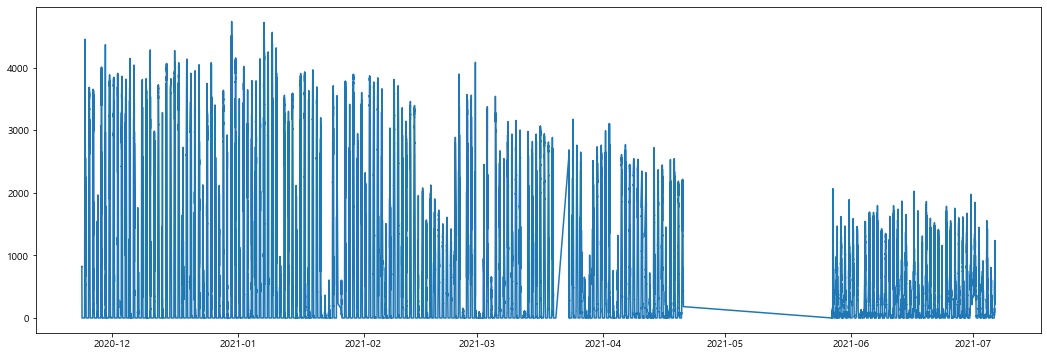

In [28]:
plt.figure(figsize=(18,6))
plt.plot(df2['PV_tot(W)'])
plt.show()

In [29]:
# 데이터 저장
df2.to_csv('./kpeb2_PV(W).csv', encoding='euc=kr')

# 데이터 분석

## 전체데이터 도식화

### 전처리 전 데이터

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


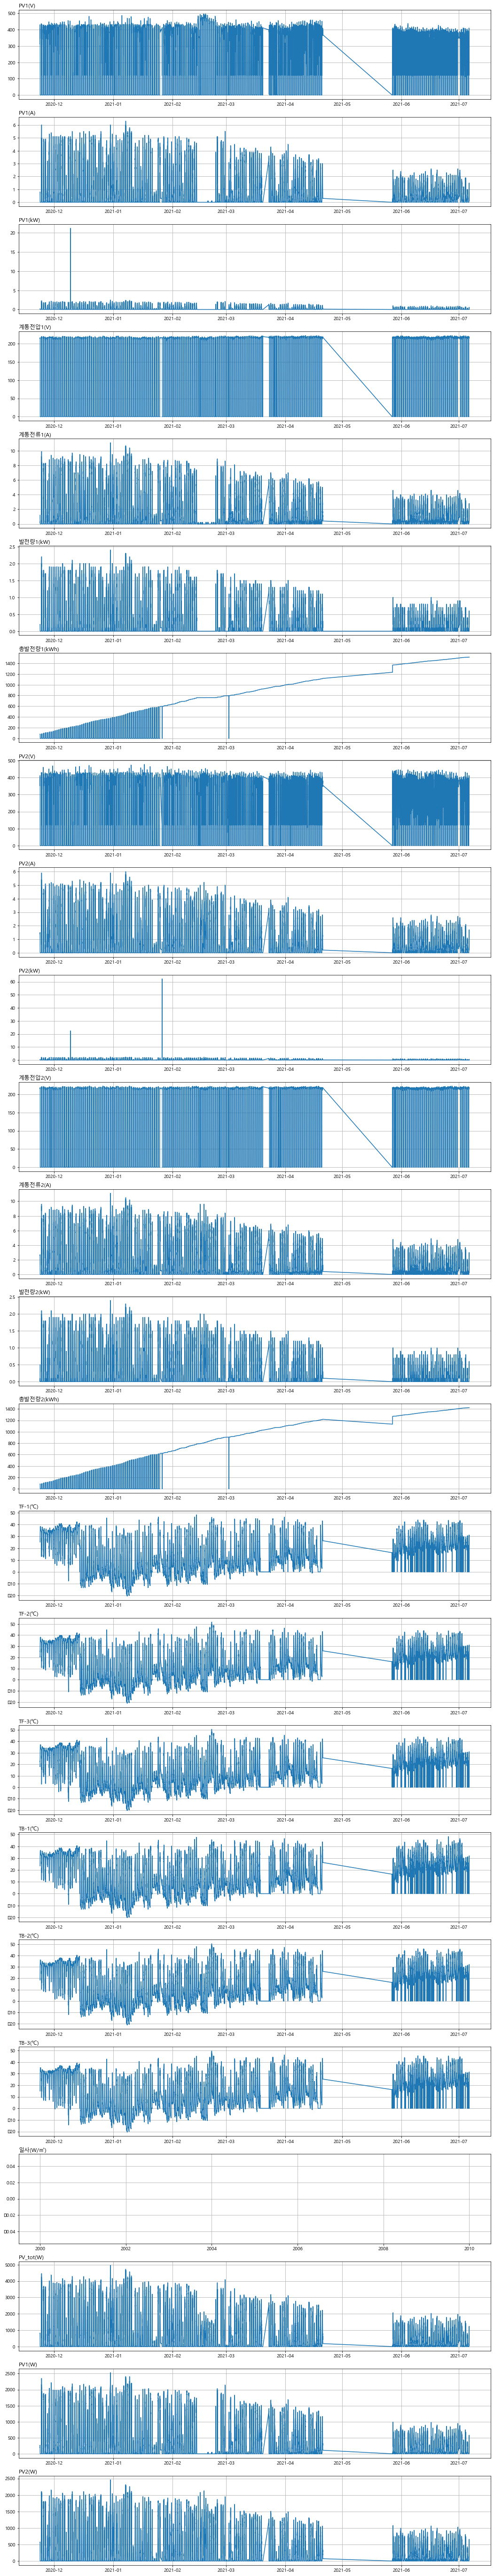

In [22]:
fig, ax = plt.subplots(figsize=(18,100))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])    
    plt.title(name, loc = 'left', pad=5)   
    plt.yticks()
    plt.grid(True)
plt.show()
fig.tight_layout()

### 전처리 후 데이터 

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


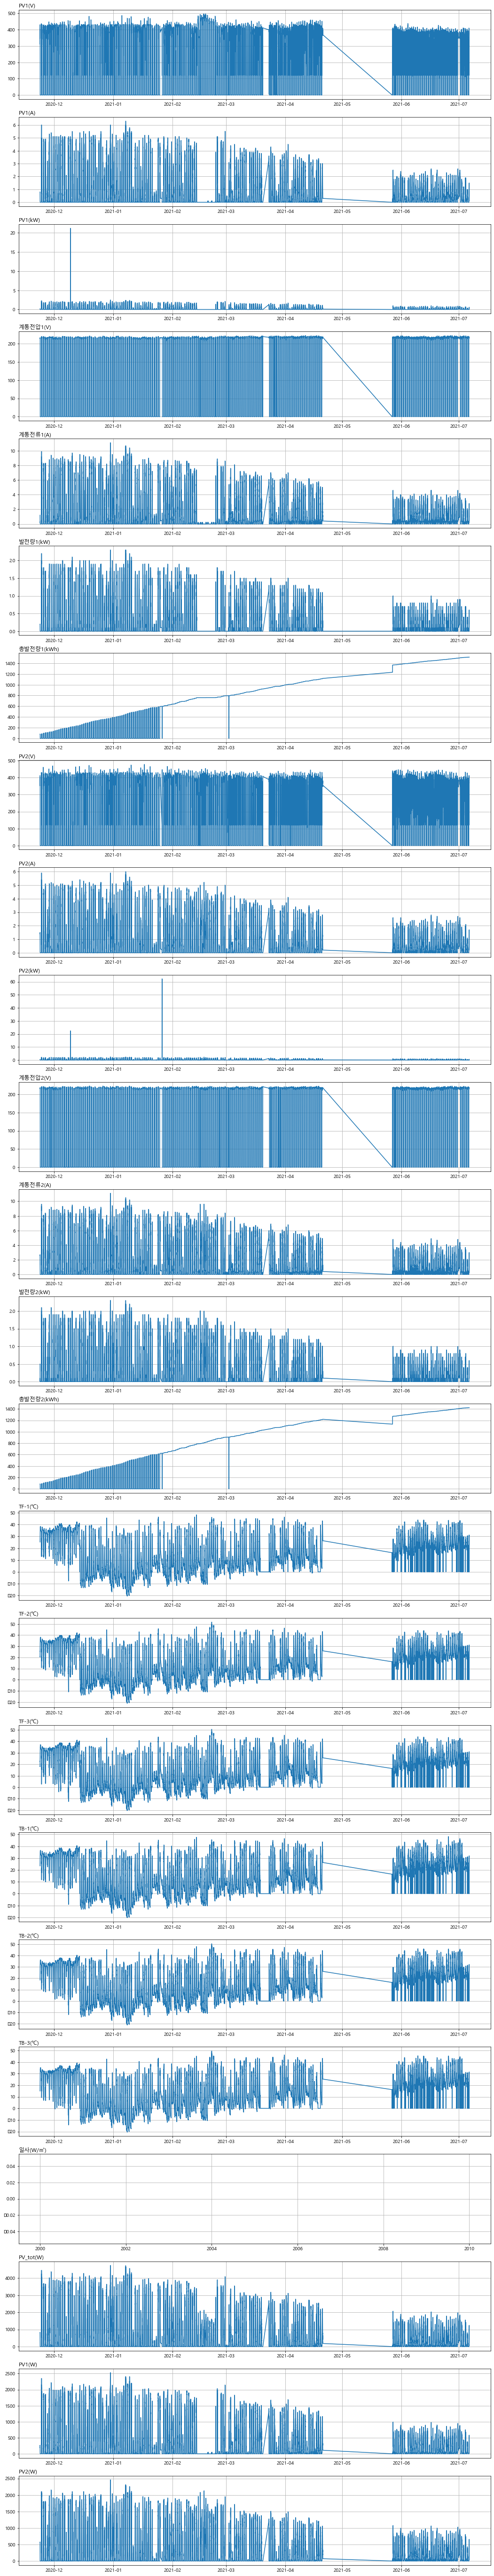

In [30]:
fig, ax = plt.subplots(figsize=(18,100))

for i in range(len(df2.columns)):
    plt.subplot(len(df2.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df2[name])    
    plt.title(name, loc = 'left', pad=5)   
    plt.yticks()
    plt.grid(True)
plt.show()
fig.tight_layout()